# Part 1 for IRIS

In [2]:
import pandas as pd
import random
import numpy as  np
import math
import matplotlib.pyplot as plt
from copy import deepcopy
import sklearn
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import operator

In [3]:
data = pd.read_csv('Iris/Iris.csv',names = ["sepal_length", "sepal_width", "petal_length", "petal_width","class"])

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
sepal_length    135 non-null float64
sepal_width     135 non-null float64
petal_length    135 non-null float64
petal_width     135 non-null float64
class           135 non-null object
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


In [6]:
data['class'].value_counts()

Iris-versicolor    46
Iris-virginica     45
Iris-setosa        44
Name: class, dtype: int64

In [7]:
def plotgraphkacc(listofk,listofacc):
    fig, ax = plt.subplots(figsize = (11,7))  
    ax.plot(listofk,listofacc , 'r')  
    ax.set_xlabel('Values of K')  
    ax.set_ylabel('Accuracy')  
    ax.set_title('Accuracy vs. K values')  

In [8]:
def distancemeasure(row1,row2,attributes,metric):
    distance = 0.0
    if metric == "euclidian":
        for attr in attributes:
            distance = distance + abs(row1[attr] - row2[attr])**2
        return np.sqrt(distance)
    if metric == "manhattan":
        for attr in attributes:
            distance +=  abs(row1[attr] - row2[attr])
        return distance
    if metric == "minkowski":
        p = 1.5
        for attr in attributes:
            distance += np.power(abs(row1[attr] - row2[attr]),p)
        return np.power(distance,(1.0)/p)
    if metric == "cosine":
        xisquare = 0.0
        yisquare = 0.0
        for attr in attributes:
            xisquare += row1[attr]**2
            yisquare += row2[attr]**2
        distance = 0.0
        for attr in attributes:
            distance += row1[attr]*row2[attr]
        
        return 1 - ((distance)/(np.sqrt(xisquare)*np.sqrt(yisquare)))
        
    

In [9]:
def getkneighbours(train_data,test_sample,k,attributes,metric,outputclass):
    distancelist = []
    for rowno,train_sample in train_data.iterrows():
        distancelist.append([distancemeasure(train_sample,test_sample,attributes,metric),train_sample[outputclass]])
    distancelist.sort()
    dictofresults = {}
    for nums in range(k):
        if distancelist[nums][1] in dictofresults.keys():
            dictofresults[distancelist[nums][1]] += 1
        else:
            dictofresults[distancelist[nums][1]] = 1
    #print(distancelist)
    #print(dictofresults)
    #print(max(dictofresults.items(), key=operator.itemgetter(1))[0],"selected")
    return max(dictofresults.items(), key=operator.itemgetter(1))[0]
        
   
        

# Iris without K-Cross Fold

In [10]:
train_data = data.sample(frac = 0.8, random_state = 200)
valid_data = data.drop(train_data.index)

attributes = list(data)
attr = deepcopy(attributes)
attr.remove('class')

listofpred = []

avg_accuracy = {}
#k = 9
for nums in range(1,math.floor(np.sqrt(len(train_data))) + 1):
    k = nums
    accuracy = []
    originaly = []
    predy = []
    rightans = 0
    wrongans = 0

    for rowno,testsample in valid_data.iterrows():
        ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
        originaly.append(testsample['class'])
        predy.append(ans)
        #print(ans,testsample['class'])
        if(ans == testsample['class']):
            rightans += 1
        else:
            wrongans += 1
    
    accuracy.append(rightans/(rightans+wrongans))
    print(rightans/(rightans+wrongans))
    avg_accuracy[k] = sum(accuracy) / len(accuracy) 
    listofpred.append(originaly)
    listofpred.append(predy)

0.9629629629629629
0.9629629629629629
1.0
0.8888888888888888
0.9259259259259259
0.8888888888888888
0.9259259259259259
0.9259259259259259
0.9629629629629629
0.9629629629629629


In [11]:
len(train_data)
len(valid_data)

27

# Classification report for each k

In [12]:
for i in range(0,int(len(listofpred)/2)):
    print("K: ",i+1)
    print(sklearn.metrics.classification_report(listofpred[2*i] , listofpred[2*i+1]))

K:  1
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.96      0.96      0.96        27
      macro avg       0.97      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27

K:  2
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.96      0.96      0.96        27
      macro avg       0.97      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27

K:  3
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-

# Comparison with sklearn KNN

In [13]:
le = preprocessing.LabelEncoder()
valid_data['class'] = le.fit_transform(valid_data['class'])
train_data['class'] = le.fit_transform(train_data['class'])

for nums in range(1,math.floor(np.sqrt(len(train_data))) + 1):
    model = KNeighborsClassifier(nums,metric= 'euclidean')
    

    accuracy = []
    originaly = []
    predy = []
    
    
    model.fit(train_data.drop('class',axis=1),train_data['class'])
    

    for rowno,testsample in valid_data.iterrows():
        ans = model.predict([testsample.drop('class')])
        originaly.append(testsample['class'])
        predy.append(ans)
        if(ans == testsample['class']):
            rightans += 1
        else:
            wrongans += 1
    
    accuracy.append(rightans/(rightans+wrongans))
    #print(accuracy)
    avg_accuracy[k] = sum(accuracy) / len(accuracy) 
    print("K: ",nums)
    print(sklearn.metrics.classification_report(originaly, predy))

K:  1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.88      0.93         8

   micro avg       0.96      0.96      0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

K:  2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.88      0.93         8

   micro avg       0.96      0.96      0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

K:  3
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00         8

  

# Part 2 for IRIS

## Iris With K-Cross fold validation for ploting graph w.r.t diff. values of k

In [14]:


attributes = list(data)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy_kcross = {}
#k = 9
for nums in range(1,10):
    k = nums
    kf = KFold(n_splits = 5,shuffle = True,random_state = 200)
    indices = kf.split(data)
    accuracy = []
    for train_index,valid_index in indices:
        rightans = 0
        wrongans = 0
        train_data = data.loc[train_index]
        valid_data = data.loc[valid_index]
        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
            if(ans == testsample['class']):
                rightans += 1
            else:
                wrongans += 1
        #print(accuracy)
        accuracy.append(rightans/(rightans+wrongans))
        avg_accuracy_kcross[k] = sum(accuracy) / len(accuracy) 

In [15]:
print(avg_accuracy_kcross)

{1: 0.9481481481481483, 2: 0.9481481481481483, 3: 0.962962962962963, 4: 0.9407407407407409, 5: 0.9555555555555555, 6: 0.9481481481481481, 7: 0.962962962962963, 8: 0.9703703703703702, 9: 0.9777777777777776}


# Plotting graph using k cross validation for different values of K

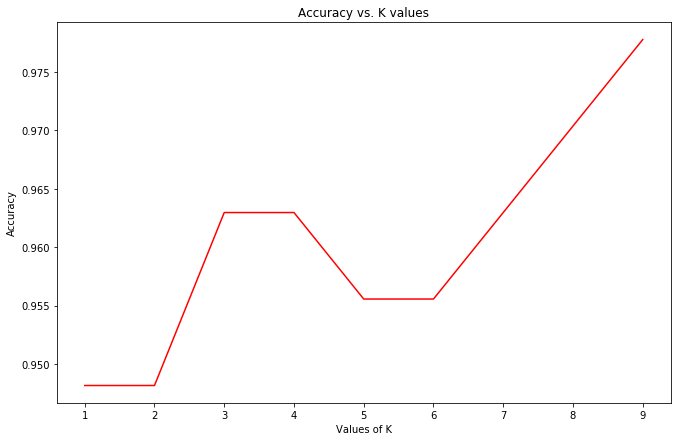

In [18]:
plotgraphkacc(avg_accuracy_kcross.keys(),avg_accuracy_kcross.values())

# Using different distance measures

In [20]:
distance_measures = ['euclidian','minkowski','manhattan','cosine']
train_data = data.sample(frac = 0.8, random_state = 200)
valid_data = data.drop(train_data.index)

attributes = list(data)
attr = deepcopy(attributes)
attr.remove('class')

listofpred = []

avg_accuracy = {}
#k = 9
for nums in range(1,math.floor(np.sqrt(len(train_data))) + 1):
    print("K: ",nums)
    for distance_met in distance_measures:
        print(distance_met+":",end=" ")
        k = nums
        accuracy = []
        originaly = []
        predy = []
        rightans = 0
        wrongans = 0

        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,distance_met,'class')
            originaly.append(testsample['class'])
            predy.append(ans)
            #print(ans,testsample['class'])
            if(ans == testsample['class']):
                rightans += 1
            else:
                wrongans += 1

        accuracy.append(rightans/(rightans+wrongans))
        print(rightans/(rightans+wrongans))
#         avg_accuracy[k] = sum(accuracy) / len(accuracy) 
#         listofpred.append(originaly)
#         listofpred.append(predy)

K:  1
euclidian: 0.9629629629629629
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  2
euclidian: 0.9259259259259259
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  3
euclidian: 1.0
minkowski: 1.0
manhattan: 1.0
cosine: 1.0
K:  4
euclidian: 0.9629629629629629
minkowski: 0.9629629629629629
manhattan: 0.9629629629629629
cosine: 1.0
K:  5
euclidian: 0.9259259259259259
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  6
euclidian: 0.9259259259259259
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  7
euclidian: 0.9259259259259259
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  8
euclidian: 0.9629629629629629
minkowski: 0.9629629629629629
manhattan: 0.9629629629629629
cosine: 1.0
K:  9
euclidian: 0.9629629629629629
minkowski: 0.9259259259259259
manhattan: 0.9259259259259259
cosine: 1.0
K:  10
euclidian: 0.9259259259259259
minkowski: 0.9259259259259259
manhat

# Part 1 for Robot -1

## Robot1 without k cross fold

In [19]:
data2 = pd.read_csv('RobotDataset/Robot1',sep = ' ',names = ["class", "a1", "a2", "a3","a4","a5","a6","ID"],usecols = [1,2,3,4,5,6,7,8],engine = "python")

In [20]:
data2 = data2.drop('ID',axis=1)

In [21]:
data2.info()
data2['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
class    124 non-null int64
a1       124 non-null int64
a2       124 non-null int64
a3       124 non-null int64
a4       124 non-null int64
a5       124 non-null int64
a6       124 non-null int64
dtypes: int64(7)
memory usage: 6.9 KB


1    62
0    62
Name: class, dtype: int64

In [43]:
train_data = data2.sample(frac = 0.8, random_state = 200)
valid_data = data2.drop(train_data.index)
attributes = list(data2)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}

for nums in range(1,10):
    k = nums
    accuracy = []
    wcount = 0
    rcount  = 0
    tp =0
    tn = 0
    fp = 0
    fn = 0
    for rowno,testsample in valid_data.iterrows():
        ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
        decision = ans
        if (testsample['class'] == decision):
            rcount += 1
            if(decision == 1):
                tp += 1
            else:
                tn += 1
        else:
            wcount += 1
            if(decision == 1):
                fp += 1
            else:
                fn += 1
    print("K:",nums)
    print("accuracy: ",rcount/(rcount+wcount))
    print("true positive: ",tp)
    print("true negative: ",tn)
    print("false positive: ",fp)
    print("false negative: ",fn)
    print("recall: ",(tp)/(tp+fn))
    print("precison: ",(tp)/(tp+fp))
    print("F1 score:",2*(1/((1/((tp)/(tp+fn))) + (1/((tp)/(tp+fp))))))

    accuracy.append(rcount*1.0/(rcount+wcount))
    print()


K: 1
accuracy:  0.72
true positive:  6
true negative:  12
false positive:  3
false negative:  4
recall:  0.6
precison:  0.6666666666666666
F1 score: 0.631578947368421

K: 2
accuracy:  0.84
true positive:  6
true negative:  15
false positive:  0
false negative:  4
recall:  0.6
precison:  1.0
F1 score: 0.7499999999999999

K: 3
accuracy:  0.76
true positive:  7
true negative:  12
false positive:  3
false negative:  3
recall:  0.7
precison:  0.7
F1 score: 0.7

K: 4
accuracy:  0.76
true positive:  5
true negative:  14
false positive:  1
false negative:  5
recall:  0.5
precison:  0.8333333333333334
F1 score: 0.625

K: 5
accuracy:  0.8
true positive:  6
true negative:  14
false positive:  1
false negative:  4
recall:  0.6
precison:  0.8571428571428571
F1 score: 0.7058823529411764

K: 6
accuracy:  0.72
true positive:  4
true negative:  14
false positive:  1
false negative:  6
recall:  0.4
precison:  0.8
F1 score: 0.5333333333333333

K: 7
accuracy:  0.72
true positive:  5
true negative:  13
fal

# Comparison with scikit learn

In [23]:
le = preprocessing.LabelEncoder()
valid_data['class'] = le.fit_transform(valid_data['class'])
train_data['class'] = le.fit_transform(train_data['class'])

for nums in range(1,math.floor(np.sqrt(len(train_data))) + 1):
    model = KNeighborsClassifier(nums,metric= 'euclidean')
    

    accuracy = []
    originaly = []
    predy = []
    
    
    model.fit(train_data.drop('class',axis=1),train_data['class'])
    

    for rowno,testsample in valid_data.iterrows():
        ans = model.predict([testsample.drop('class')])
        originaly.append(testsample['class'])
        predy.append(ans)
        if(ans == testsample['class']):
            rightans += 1
        else:
            wrongans += 1
    
    accuracy.append(rightans/(rightans+wrongans))
    #print(accuracy)
    avg_accuracy[k] = sum(accuracy) / len(accuracy) 
    print("K: ",nums)
    print(sklearn.metrics.classification_report(originaly, predy))

K:  1
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.55      0.60      0.57        10

   micro avg       0.64      0.64      0.64        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.65      0.64      0.64        25

K:  2
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.86      0.60      0.71        10

   micro avg       0.80      0.80      0.80        25
   macro avg       0.82      0.77      0.78        25
weighted avg       0.81      0.80      0.79        25

K:  3
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.64      0.70      0.67        10

   micro avg       0.72      0.72      0.72        25
   macro avg       0.71      0.72      0.71        25
weighted avg       0.73      0.72      0.72        25

K

# Part 2 for Robot 1

## Robot 1 with K cross fold for ploting graph w.r.t accuracy with different k

In [42]:
attributes = list(data2)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}

for nums in range(1,10):
    k = nums
    accuracy = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = 200)
    indices = kf.split(data2)
    for train_index,valid_index in indices:
        rightans = 0
        wrongans = 0
        train_data = data2.loc[train_index]
        valid_data = data2.loc[valid_index]
        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
            if(ans == testsample['class']):
                rightans += 1
            else:
                wrongans += 1
        accuracy.append(rightans*1.0/(rightans+wrongans))
        print(accuracy)
        avg_accuracy[k] = sum(accuracy) / len(accuracy) 

[0.52]
[0.52, 0.76]
[0.52, 0.76, 0.68]
[0.52, 0.76, 0.68, 0.72]
[0.52, 0.76, 0.68, 0.72, 0.7083333333333334]
[0.52]
[0.52, 0.72]
[0.52, 0.72, 0.6]
[0.52, 0.72, 0.6, 0.72]
[0.52, 0.72, 0.6, 0.72, 0.8333333333333334]
[0.68]
[0.68, 0.76]
[0.68, 0.76, 0.76]
[0.68, 0.76, 0.76, 0.76]
[0.68, 0.76, 0.76, 0.76, 0.75]
[0.64]
[0.64, 0.76]
[0.64, 0.76, 0.68]
[0.64, 0.76, 0.68, 0.8]
[0.64, 0.76, 0.68, 0.8, 0.75]
[0.72]
[0.72, 0.8]
[0.72, 0.8, 0.72]
[0.72, 0.8, 0.72, 0.8]
[0.72, 0.8, 0.72, 0.8, 0.7916666666666666]
[0.72]
[0.72, 0.72]
[0.72, 0.72, 0.68]
[0.72, 0.72, 0.68, 0.8]
[0.72, 0.72, 0.68, 0.8, 0.7083333333333334]
[0.8]
[0.8, 0.68]
[0.8, 0.68, 0.72]
[0.8, 0.68, 0.72, 0.84]
[0.8, 0.68, 0.72, 0.84, 0.7083333333333334]
[0.8]
[0.8, 0.72]
[0.8, 0.72, 0.72]
[0.8, 0.72, 0.72, 0.84]
[0.8, 0.72, 0.72, 0.84, 0.75]
[0.8]
[0.8, 0.72]
[0.8, 0.72, 0.76]
[0.8, 0.72, 0.76, 0.88]
[0.8, 0.72, 0.76, 0.88, 0.7083333333333334]


In [28]:
print(avg_accuracy)

{1: 0.6776666666666666, 2: 0.6786666666666666, 3: 0.742, 4: 0.726, 5: 0.7663333333333333, 6: 0.7256666666666667, 7: 0.7496666666666667, 8: 0.766, 9: 0.7736666666666667}


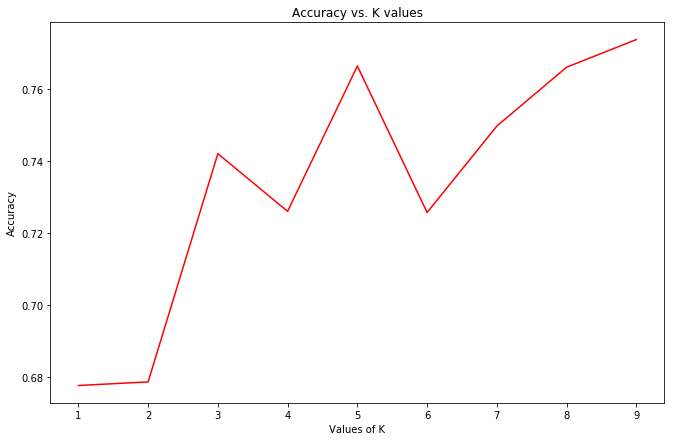

In [29]:
plotgraphkacc(avg_accuracy.keys(),avg_accuracy.values())

# Using different distance measures

In [33]:
distance_measures = ['euclidian','minkowski','manhattan','cosine']
rain_data = data2.sample(frac = 0.8, random_state = 200)
valid_data = data2.drop(train_data.index)
attributes = list(data2)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}

for nums in range(1,10):
    print("K: " + str(nums))
    for distance_met in distance_measures:
        print(distance_met+":",end=" ")
        k = nums
        accuracy = []
        wcount = 0
        rcount  = 0
        tp =0
        tn = 0
        fp = 0
        fn = 0
        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,distance_met,'class')
            decision = ans
            if (testsample['class'] == decision):
                rcount += 1
                if(decision == 1):
                    tp += 1
                else:
                    tn += 1
            else:
                wcount += 1
                if(decision == 1):
                    fp += 1
                else:
                    fn += 1

        print("accuracy: ",rcount/(rcount+wcount))
#         print("true positive: ",tp)
#         print("true negative: ",tn)
#         print("false positive: ",fp)
#         print("false negative: ",fn)
#         print("recall: ",(tp)/(tp+fn))
#         print("precison: ",(tp)/(tp+fp))
#         print("F1 score:",2*(1/((1/((tp)/(tp+fn))) + (1/((tp)/(tp+fp))))))

#       #accuracy.append(rcount*1.0/(rcount+wcount))
        #print(accuracy)


K: 1
euclidian: accuracy:  0.72
minkowski: accuracy:  0.72
manhattan: accuracy:  0.72
cosine: accuracy:  0.72
K: 2
euclidian: accuracy:  0.84
minkowski: accuracy:  0.84
manhattan: accuracy:  0.84
cosine: accuracy:  0.76
K: 3
euclidian: accuracy:  0.76
minkowski: accuracy:  0.76
manhattan: accuracy:  0.76
cosine: accuracy:  0.76
K: 4
euclidian: accuracy:  0.76
minkowski: accuracy:  0.76
manhattan: accuracy:  0.76
cosine: accuracy:  0.84
K: 5
euclidian: accuracy:  0.8
minkowski: accuracy:  0.8
manhattan: accuracy:  0.76
cosine: accuracy:  0.8
K: 6
euclidian: accuracy:  0.72
minkowski: accuracy:  0.72
manhattan: accuracy:  0.68
cosine: accuracy:  0.84
K: 7
euclidian: accuracy:  0.72
minkowski: accuracy:  0.72
manhattan: accuracy:  0.76
cosine: accuracy:  0.8
K: 8
euclidian: accuracy:  0.76
minkowski: accuracy:  0.8
manhattan: accuracy:  0.8
cosine: accuracy:  0.8
K: 9
euclidian: accuracy:  0.72
minkowski: accuracy:  0.72
manhattan: accuracy:  0.76
cosine: accuracy:  0.72


# Part 1 for Robot 2
## Robot 2 without k cross fold

In [34]:
data3 = pd.read_csv('RobotDataset/Robot2',sep = ' ',names = ["class", "a1", "a2", "a3","a4","a5","a6","ID"],usecols = [1,2,3,4,5,6,7,8],engine = "python")

In [35]:
data3 = data3.drop('ID',axis=1)

In [41]:
train_data = data3.sample(frac = 0.8, random_state = 200)
valid_data = data3.drop(train_data.index)
attributes = list(data3)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}

for nums in range(1,10):
    k = nums
    accuracy = []
    wcount = 0
    rcount  = 0
    tp =0
    tn = 0
    fp = 0
    fn = 0
    for rowno,testsample in valid_data.iterrows():
        ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
        decision = ans
        if (testsample['class'] == decision):
            rcount += 1
            if(decision == 1):
                tp += 1
            else:
                tn += 1
        else:
            wcount += 1
            if(decision == 1):
                fp += 1
            else:
                fn += 1
    print("K:",nums)
    print("accuracy: ",rcount/(rcount+wcount))
    print("true positive: ",tp)
    print("true negative: ",tn)
    print("false positive: ",fp)
    print("false negative: ",fn)
    print("recall: ",(tp)/(tp+fn))
    print("precison: ",(tp)/(tp+fp))
    print("F1 score:",2*(1/((1/((tp)/(tp+fn))) + (1/((tp)/(tp+fp))))))

    accuracy.append(rcount*1.0/(rcount+wcount))
    print()


K: 1
accuracy:  0.8333333333333334
true positive:  7
true negative:  13
false positive:  0
false negative:  4
recall:  0.6363636363636364
precison:  1.0
F1 score: 0.7777777777777779

K: 2
accuracy:  0.7083333333333334
true positive:  4
true negative:  13
false positive:  0
false negative:  7
recall:  0.36363636363636365
precison:  1.0
F1 score: 0.5333333333333333

K: 3
accuracy:  0.8333333333333334
true positive:  7
true negative:  13
false positive:  0
false negative:  4
recall:  0.6363636363636364
precison:  1.0
F1 score: 0.7777777777777779

K: 4
accuracy:  0.8333333333333334
true positive:  7
true negative:  13
false positive:  0
false negative:  4
recall:  0.6363636363636364
precison:  1.0
F1 score: 0.7777777777777779

K: 5
accuracy:  0.8333333333333334
true positive:  7
true negative:  13
false positive:  0
false negative:  4
recall:  0.6363636363636364
precison:  1.0
F1 score: 0.7777777777777779

K: 6
accuracy:  0.8333333333333334
true positive:  7
true negative:  13
false positi

# Comparison with sklearn

In [44]:
le = preprocessing.LabelEncoder()
valid_data['class'] = le.fit_transform(valid_data['class'])
train_data['class'] = le.fit_transform(train_data['class'])

for nums in range(1,math.floor(np.sqrt(len(train_data))) + 1):
    model = KNeighborsClassifier(nums,metric= 'euclidean')
    

    accuracy = []
    originaly = []
    predy = []
    
    
    model.fit(train_data.drop('class',axis=1),train_data['class'])
    

    for rowno,testsample in valid_data.iterrows():
        ans = model.predict([testsample.drop('class')])
        originaly.append(testsample['class'])
        predy.append(ans)
        if(ans == testsample['class']):
            rightans += 1
        else:
            wrongans += 1
    
    accuracy.append(rightans/(rightans+wrongans))
    #print(accuracy)
    avg_accuracy[k] = sum(accuracy) / len(accuracy) 
    print("K: ",nums)
    print(sklearn.metrics.classification_report(originaly, predy))

K:  1
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.55      0.60      0.57        10

   micro avg       0.64      0.64      0.64        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.65      0.64      0.64        25

K:  2
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.86      0.60      0.71        10

   micro avg       0.80      0.80      0.80        25
   macro avg       0.82      0.77      0.78        25
weighted avg       0.81      0.80      0.79        25

K:  3
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.64      0.70      0.67        10

   micro avg       0.72      0.72      0.72        25
   macro avg       0.71      0.72      0.71        25
weighted avg       0.73      0.72      0.72        25

K

# Part 2 for Robot2

## Robot 2 with k cross fold validation for plotting graph w.r.t. different k

In [45]:
attributes = list(data3)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}
# k = 22 #robo1
# k = 29# robo2
for nums in range(1,10):
    k = nums
    accuracy = []
    kf = KFold(n_splits = 5,shuffle = True,random_state = 200)
    indices = kf.split(data3)
    for train_index,valid_index in indices:
        rightans = 0
        wrongans = 0
        train_data = data3.loc[train_index]
        valid_data = data3.loc[valid_index]
        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,'euclidian','class')
            if(ans == testsample['class']):
                rightans += 1
            else:
                wrongans += 1
        accuracy.append(rightans*1.0/(rightans+wrongans))
        print(accuracy)
        avg_accuracy[k] = sum(accuracy) / len(accuracy) 

[0.8]
[0.8, 0.76]
[0.8, 0.76, 0.75]
[0.8, 0.76, 0.75, 0.9583333333333334]
[0.8, 0.76, 0.75, 0.9583333333333334, 0.8333333333333334]
[0.76]
[0.76, 0.84]
[0.76, 0.84, 0.6666666666666666]
[0.76, 0.84, 0.6666666666666666, 0.8333333333333334]
[0.76, 0.84, 0.6666666666666666, 0.8333333333333334, 0.7083333333333334]
[0.8]
[0.8, 0.8]
[0.8, 0.8, 0.7916666666666666]
[0.8, 0.8, 0.7916666666666666, 0.875]
[0.8, 0.8, 0.7916666666666666, 0.875, 0.8333333333333334]
[0.8]
[0.8, 0.76]
[0.8, 0.76, 0.7916666666666666]
[0.8, 0.76, 0.7916666666666666, 0.9166666666666666]
[0.8, 0.76, 0.7916666666666666, 0.9166666666666666, 0.8333333333333334]
[0.84]
[0.84, 0.68]
[0.84, 0.68, 0.8333333333333334]
[0.84, 0.68, 0.8333333333333334, 0.875]
[0.84, 0.68, 0.8333333333333334, 0.875, 0.8333333333333334]
[0.8]
[0.8, 0.72]
[0.8, 0.72, 0.8333333333333334]
[0.8, 0.72, 0.8333333333333334, 0.875]
[0.8, 0.72, 0.8333333333333334, 0.875, 0.8333333333333334]
[0.88]
[0.88, 0.76]
[0.88, 0.76, 0.8333333333333334]
[0.88, 0.76, 0.83

In [75]:
print(avg_accuracy)

{1: 0.8203333333333334, 2: 0.7616666666666667, 3: 0.82, 4: 0.8203333333333334, 5: 0.8123333333333334, 6: 0.8123333333333334, 7: 0.8446666666666667, 8: 0.8366666666666667, 9: 0.8773333333333333, 10: 0.853, 11: 0.8693333333333333, 12: 0.8613333333333333, 13: 0.861, 14: 0.869, 15: 0.8693333333333333, 16: 0.8773333333333333, 17: 0.8939999999999999, 18: 0.8939999999999999, 19: 0.8856666666666666}


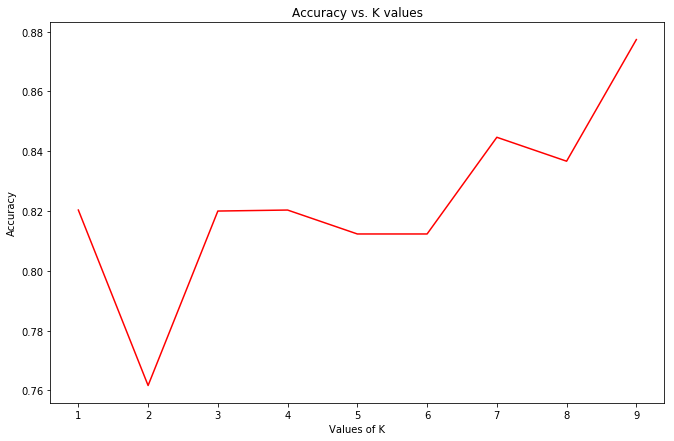

In [46]:
plotgraphkacc(avg_accuracy.keys(),avg_accuracy.values())

# Different distance measures for robot2

In [47]:
distance_measures = ['euclidian','minkowski','manhattan','cosine']
rain_data = data3.sample(frac = 0.8, random_state = 200)
valid_data = data3.drop(train_data.index)
attributes = list(data3)
attr = deepcopy(attributes)
attr.remove('class')

avg_accuracy = {}

for nums in range(1,10):
    print("K: " + str(nums))
    for distance_met in distance_measures:
        print(distance_met+":",end=" ")
        k = nums
        accuracy = []
        wcount = 0
        rcount  = 0
        tp =0
        tn = 0
        fp = 0
        fn = 0
        for rowno,testsample in valid_data.iterrows():
            ans = getkneighbours(train_data,testsample,k,attr,distance_met,'class')
            decision = ans
            if (testsample['class'] == decision):
                rcount += 1
                if(decision == 1):
                    tp += 1
                else:
                    tn += 1
            else:
                wcount += 1
                if(decision == 1):
                    fp += 1
                else:
                    fn += 1

        print("accuracy: ",rcount/(rcount+wcount))
#         print("true positive: ",tp)
#         print("true negative: ",tn)
#         print("false positive: ",fp)
#         print("false negative: ",fn)
#         print("recall: ",(tp)/(tp+fn))
#         print("precison: ",(tp)/(tp+fp))
#         print("F1 score:",2*(1/((1/((tp)/(tp+fn))) + (1/((tp)/(tp+fp))))))

#       #accuracy.append(rcount*1.0/(rcount+wcount))
        #print(accuracy)


K: 1
euclidian: accuracy:  0.8333333333333334
minkowski: accuracy:  0.8333333333333334
manhattan: accuracy:  0.8333333333333334
cosine: accuracy:  0.8333333333333334
K: 2
euclidian: accuracy:  0.7083333333333334
minkowski: accuracy:  0.75
manhattan: accuracy:  0.75
cosine: accuracy:  0.7083333333333334
K: 3
euclidian: accuracy:  0.8333333333333334
minkowski: accuracy:  0.875
manhattan: accuracy:  0.8333333333333334
cosine: accuracy:  0.8333333333333334
K: 4
euclidian: accuracy:  0.8333333333333334
minkowski: accuracy:  0.8333333333333334
manhattan: accuracy:  0.7916666666666666
cosine: accuracy:  0.8333333333333334
K: 5
euclidian: accuracy:  0.8333333333333334
minkowski: accuracy:  0.8333333333333334
manhattan: accuracy:  0.7916666666666666
cosine: accuracy:  0.8333333333333334
K: 6
euclidian: accuracy:  0.8333333333333334
minkowski: accuracy:  0.8333333333333334
manhattan: accuracy:  0.75
cosine: accuracy:  0.7916666666666666
K: 7
euclidian: accuracy:  0.875
minkowski: accuracy:  0.91